In [1]:
import pandas as pd 
import numpy as np

# import the DataFrame created in 'Happyyyy.ipynb'
df = pd.read_csv('Country.csv') # 158 rows, 12 cols
df.rename(columns={'Unnamed: 0' : 'Country'}, inplace= True)
df.set_index('Country', inplace= True)

In [2]:
# correct names of countries
df.rename(index = {'Congo (Brazzaville)': 'Republic of the Congo',
                  'Congo (Kinshasa)': 'Democratic Republic of the Congo',
                  'Czech Republic': 'Czechia',
                  'North Cyprus': 'Northern Cyprus',
                  'Serbia': 'Republic of Serbia',
                  'Swaziland': 'eSwatini',
                  'Tanzania': 'United Republic of Tanzania',
                  'United States': 'United States of America'}, inplace=True)

df.drop(labels = ['Hong Kong','Palestinian Territories'], 
            inplace= True)

In [10]:
import matplotlib.pyplot as plt
import matplotlib
import cartopy
from cartopy.io import shapereader
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
import geopandas
import numpy as np


# get country borders
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'
shpfilename = shapereader.natural_earth(resolution, category, name)

# read the shapefile using geopandas
dff = geopandas.read_file(shpfilename)

def happyness_map(df, year):
    # Set up the figue
    fig = plt.figure(figsize = (8.5*2,3.5*2))
    ax = plt.axes(projection= ccrs.PlateCarree())

    # set latitude and longitude range
    ax.set_extent([-180, 180, -60, 85], ccrs.PlateCarree())

    # Add natural earth features and borders
    ax.add_feature(cartopy.feature.BORDERS)
    ax.add_feature(cartopy.feature.LAND)
    ax.coastlines()

    # Insert lists of countries and scores here
    countries = list(df.index)
    scores = list(df['Score'+str(year)])

    # Normalise the scores to between 0 and 1 to extract the colour
    scores_norm = (scores-np.nanmin(scores))/(np.nanmax(scores) - np.nanmin(scores))

    # Choose colourmap
    cmap = matplotlib.cm.get_cmap('inferno')


    for country, score_norm in zip(countries, scores_norm):
        #print(country)

        # read the borders of the country
        poly = dff.loc[dff['ADMIN'] == country]['geometry'].values[0]

        # get the color for this country
        rgba = cmap(score_norm)

        # plot the country on a map
        try:                         # if poly is Mulitpolygon, ok
            ax.add_geometries(poly, crs = ccrs.PlateCarree(), facecolor=rgba, alpha = 1.00, linewidth =0.15, edgecolor='black', zorder=1)
        except:                      # otherwise convert it
            import shapely.wkt as wkt
            from shapely.geometry import MultiPolygon
            list_str_polygons = [str(poly)]
            c = MultiPolygon(map(wkt.loads, list_str_polygons))
            ax.add_geometries(c, crs = ccrs.PlateCarree(), facecolor=rgba, alpha = 1.00, linewidth =0.15, edgecolor='black', zorder=1) 



    # Add a scatter plot of the original data so the colorbar has the correct numbers. 
    lags= df['Score'+str(year)]
    dummy_scat = ax.scatter(lags, lags, c=lags, cmap=cmap, zorder=0)
    fig.colorbar(mappable=dummy_scat, label=str(year)+' Happyness score', orientation='horizontal', shrink=0.7)
    plt.savefig(str(year)+'_happyness_map.png')

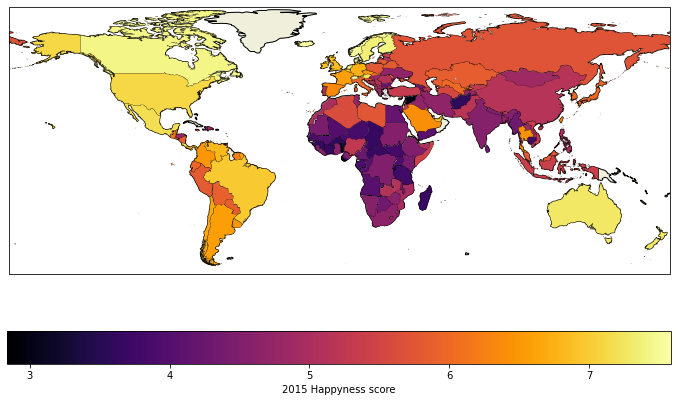

In [11]:
happyness_map(df,2015)

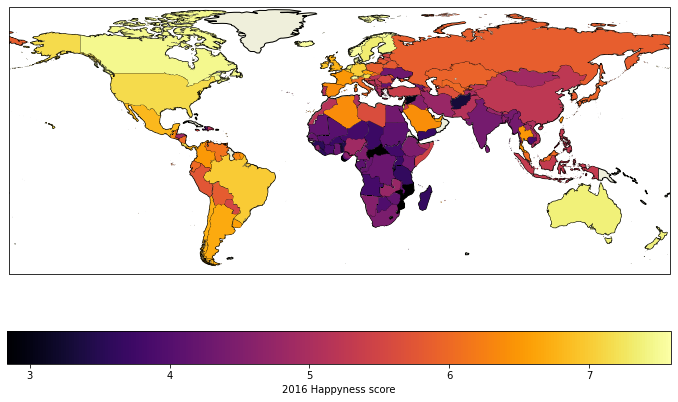

In [141]:
happyness_map(df,2016)

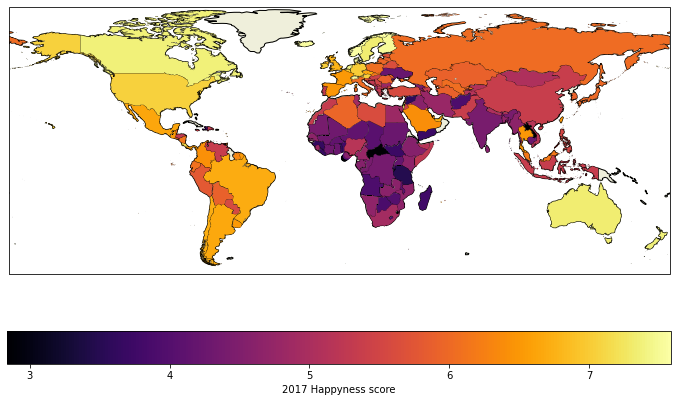

In [142]:
happyness_map(df,2017)

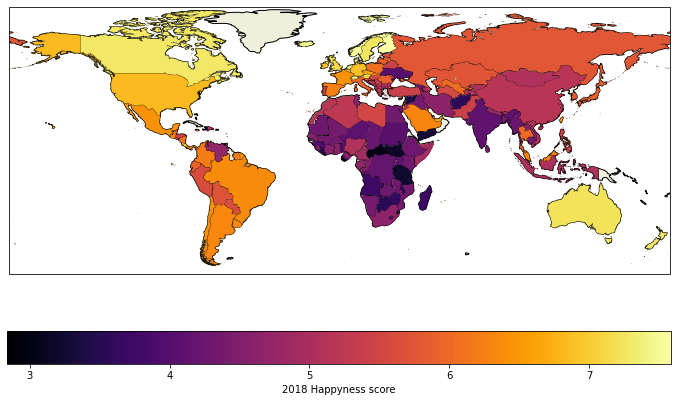

In [143]:
happyness_map(df,2018)

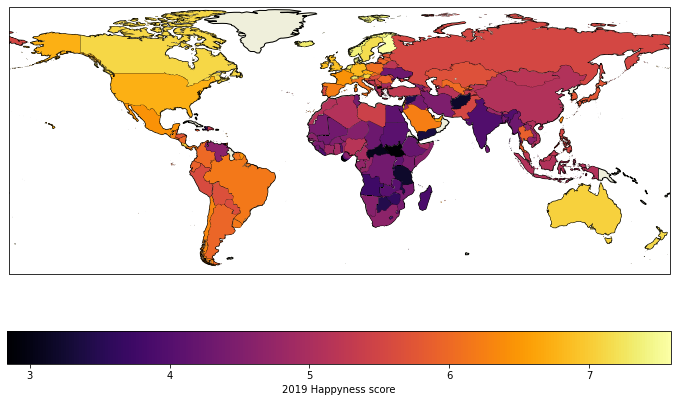

In [144]:
happyness_map(df,2019)

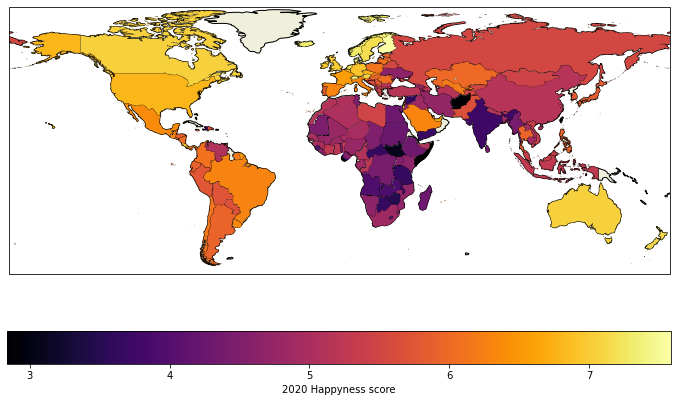

In [149]:
happyness_map(df,2020)